
Tugas 2
Tugas LO3: Mahasiswa mampu memilih metode yang cocok untuk menyiapkan data mentah guna analisis yang lebih lanjut berbasiskan kriteria pilihan data.

Carilah sebuah open-dataset.

Kriteria dataset:
- Tema bebas.
- Utamakan dataset yang masih kotor dan perlu preprocessing.
- Pastikan dataset unik untuk setiap mahasiswa.
- Kesamaan dataset dan metode analisis mengindikasikan plagiarisme --> nilai minimal.
- Lakukan preprocessing yang sesuai.
- data cleaning: detecting and removing outliers,
- data integration: detecting redundant attributes (correlation-, covariance analysis)
- data reduction - dimensionality reduction: PCA

Berikan visualisasi yang relevan yang menunjukkan hasil data preprocessing tersebut.

Deliverables:
1) Laporan singkat, yang berisi:
  a) deskripsi dataset
  b) Isi: Visualisasi, Ringkasan data numerik, seperti Insight/Patterns/Relationship/Trend yang ditemukan
  c) Summary
Laporan diketik dan memiliki maksimal 3 halaman dengan ukuran font dan spasi menyesuaikan
2) Sertakan Python script yang anda buat beserta dataset yang digunakan dalam sebuah zip file.
3) Presentasi yang menarik untuk dipresentasikan 19 September 2024

Tugas dikumpulkan melalui eLok DTETI-S1-2024-1-Rekayasa Data
maks 19 September 2024 pukul 09.00

In [134]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
# Read the data from the CSV file
data = pd.read_csv('data/IOT-temp.csv')

# Print each columns
print(data.head())

                                    id  room_id/id        noted_date  temp  \
0  __export__.temp_log_196134_bd201015  Room Admin  08-12-2018 09:30    29   
1  __export__.temp_log_196131_7bca51bc  Room Admin  08-12-2018 09:30    29   
2  __export__.temp_log_196127_522915e3  Room Admin  08-12-2018 09:29    41   
3  __export__.temp_log_196128_be0919cf  Room Admin  08-12-2018 09:29    41   
4  __export__.temp_log_196126_d30b72fb  Room Admin  08-12-2018 09:29    31   

  out/in  
0     In  
1     In  
2    Out  
3    Out  
4     In  


In [135]:
# Get info
# print(data.info())

# Info Output
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 3900 entries, 0 to 3899
# Data columns (total 18 columns):
#  #   Column                  Non-Null Count  Dtype
# ---  ------                  --------------  -----
#  0   Customer ID             3900 non-null   int64
#  1   Age                     3900 non-null   int64
#  2   Gender                  3900 non-null   object
#  3   Item Purchased          3900 non-null   object
#  4   Category                3900 non-null   object
#  5   Purchase Amount (USD)   3900 non-null   int64
#  6   Location                3900 non-null   object
#  7   Size                    3900 non-null   object
#  8   Color                   3900 non-null   object
#  9   Season                  3900 non-null   object
#  10  Review Rating           3900 non-null   float64
#  11  Subscription Status     3900 non-null   object
#  12  Shipping Type           3900 non-null   object
#  13  Discount Applied        3900 non-null   object
#  14  Promo Code Used         3900 non-null   object
#  15  Previous Purchases      3900 non-null   int64
#  16  Payment Method          3900 non-null   object
#  17  Frequency of Purchases  3900 non-null   object
# dtypes: float64(1), int64(4), object(13)
# memory usage: 548.6+ KB

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [ ]:
# List of categorical data
categoricals = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']
categoricals_len = len(categoricals)

# Convert categories into a categorical type
for category in categoricals:
    data[category] = data[category].astype('category')

# Get info after converting
print(data.info())

In [136]:
# Describe with 2 decimal places
print(data.describe().round(2))

print("\n\n")

# Describe the categorical data
print(data.describe(include='category'))

       Customer ID      Age  Purchase Amount (USD)  Review Rating  \
count      3900.00  3900.00                3900.00        3900.00   
mean       1950.50    44.07                  59.76           3.75   
std        1125.98    15.21                  23.69           0.72   
min           1.00    18.00                  20.00           2.50   
25%         975.75    31.00                  39.00           3.10   
50%        1950.50    44.00                  60.00           3.70   
75%        2925.25    57.00                  81.00           4.40   
max        3900.00    70.00                 100.00           5.00   

       Previous Purchases  
count             3900.00  
mean                25.35  
std                 14.45  
min                  1.00  
25%                 13.00  
50%                 25.00  
75%                 38.00  
max                 50.00  



       Gender Item Purchased  Category Location  Size  Color  Season  \
count    3900           3900      3900     3900  39

In [137]:
# Because Customer ID is obviously irrelevant, we can drop it
data.drop('Customer ID', axis=1, inplace=True)

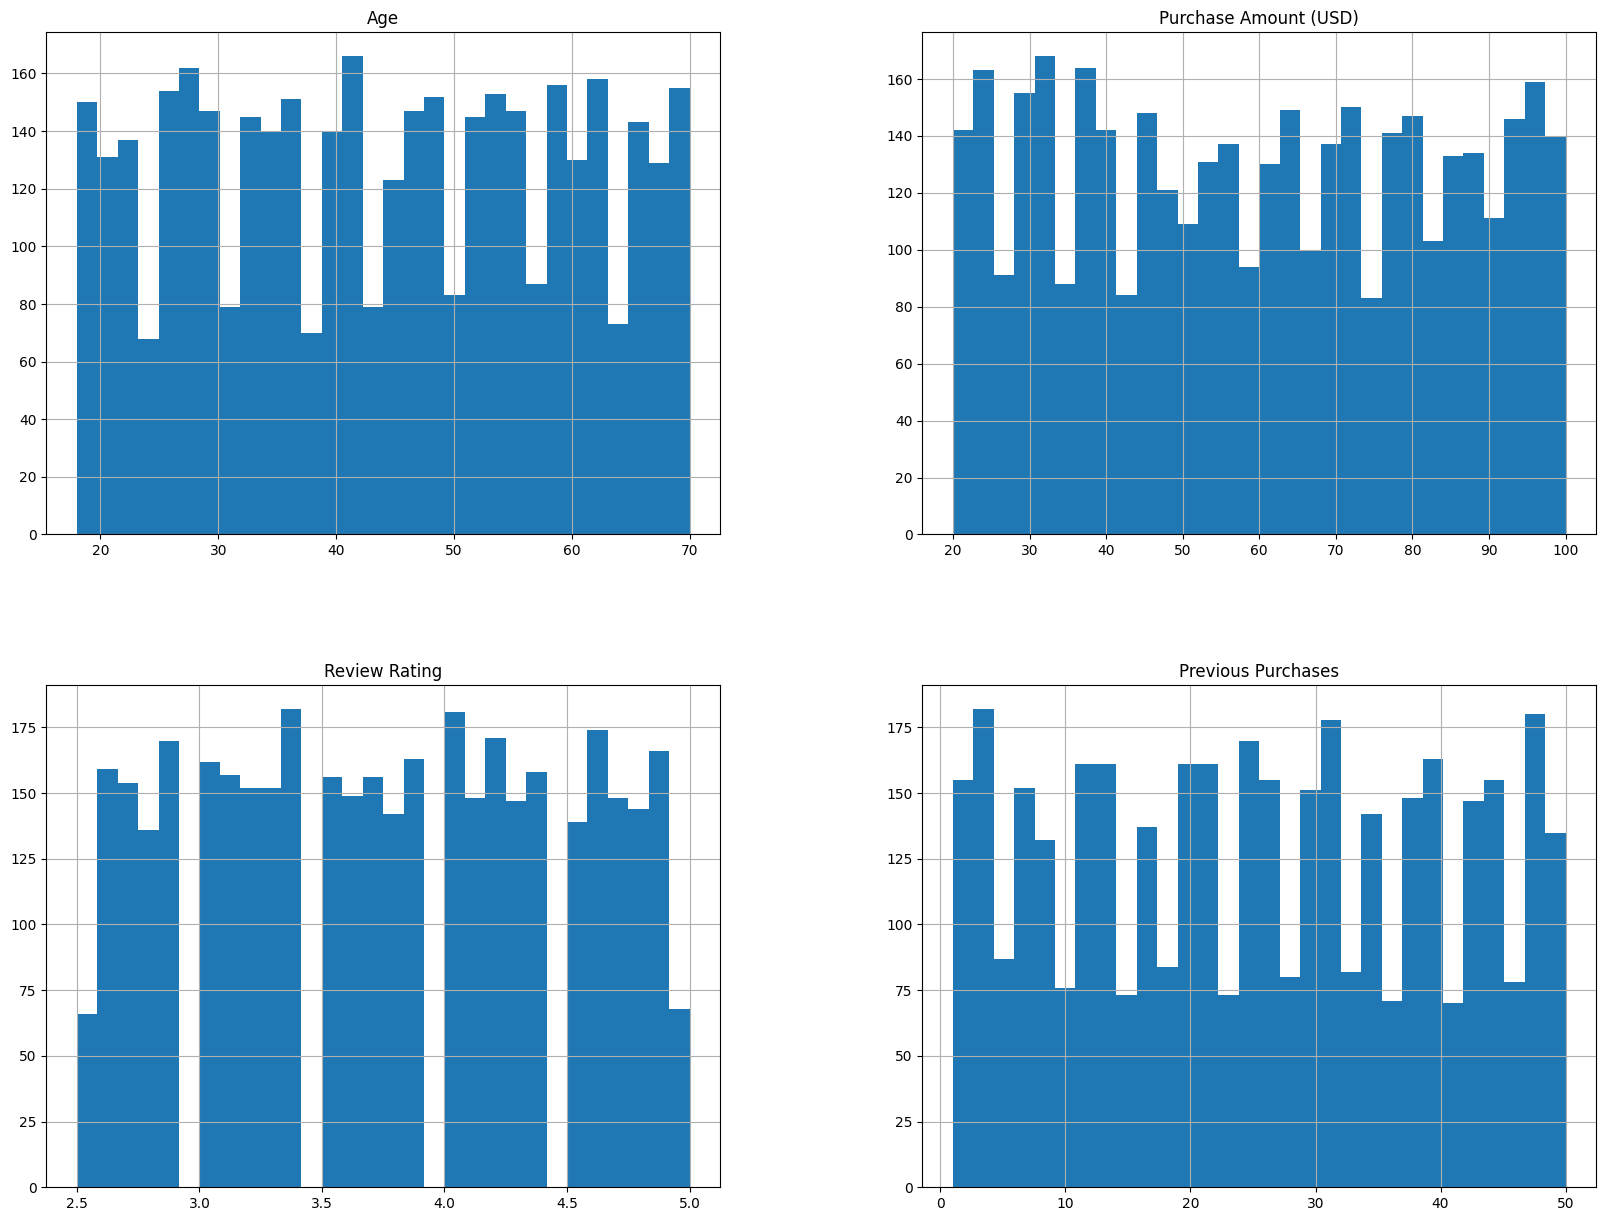

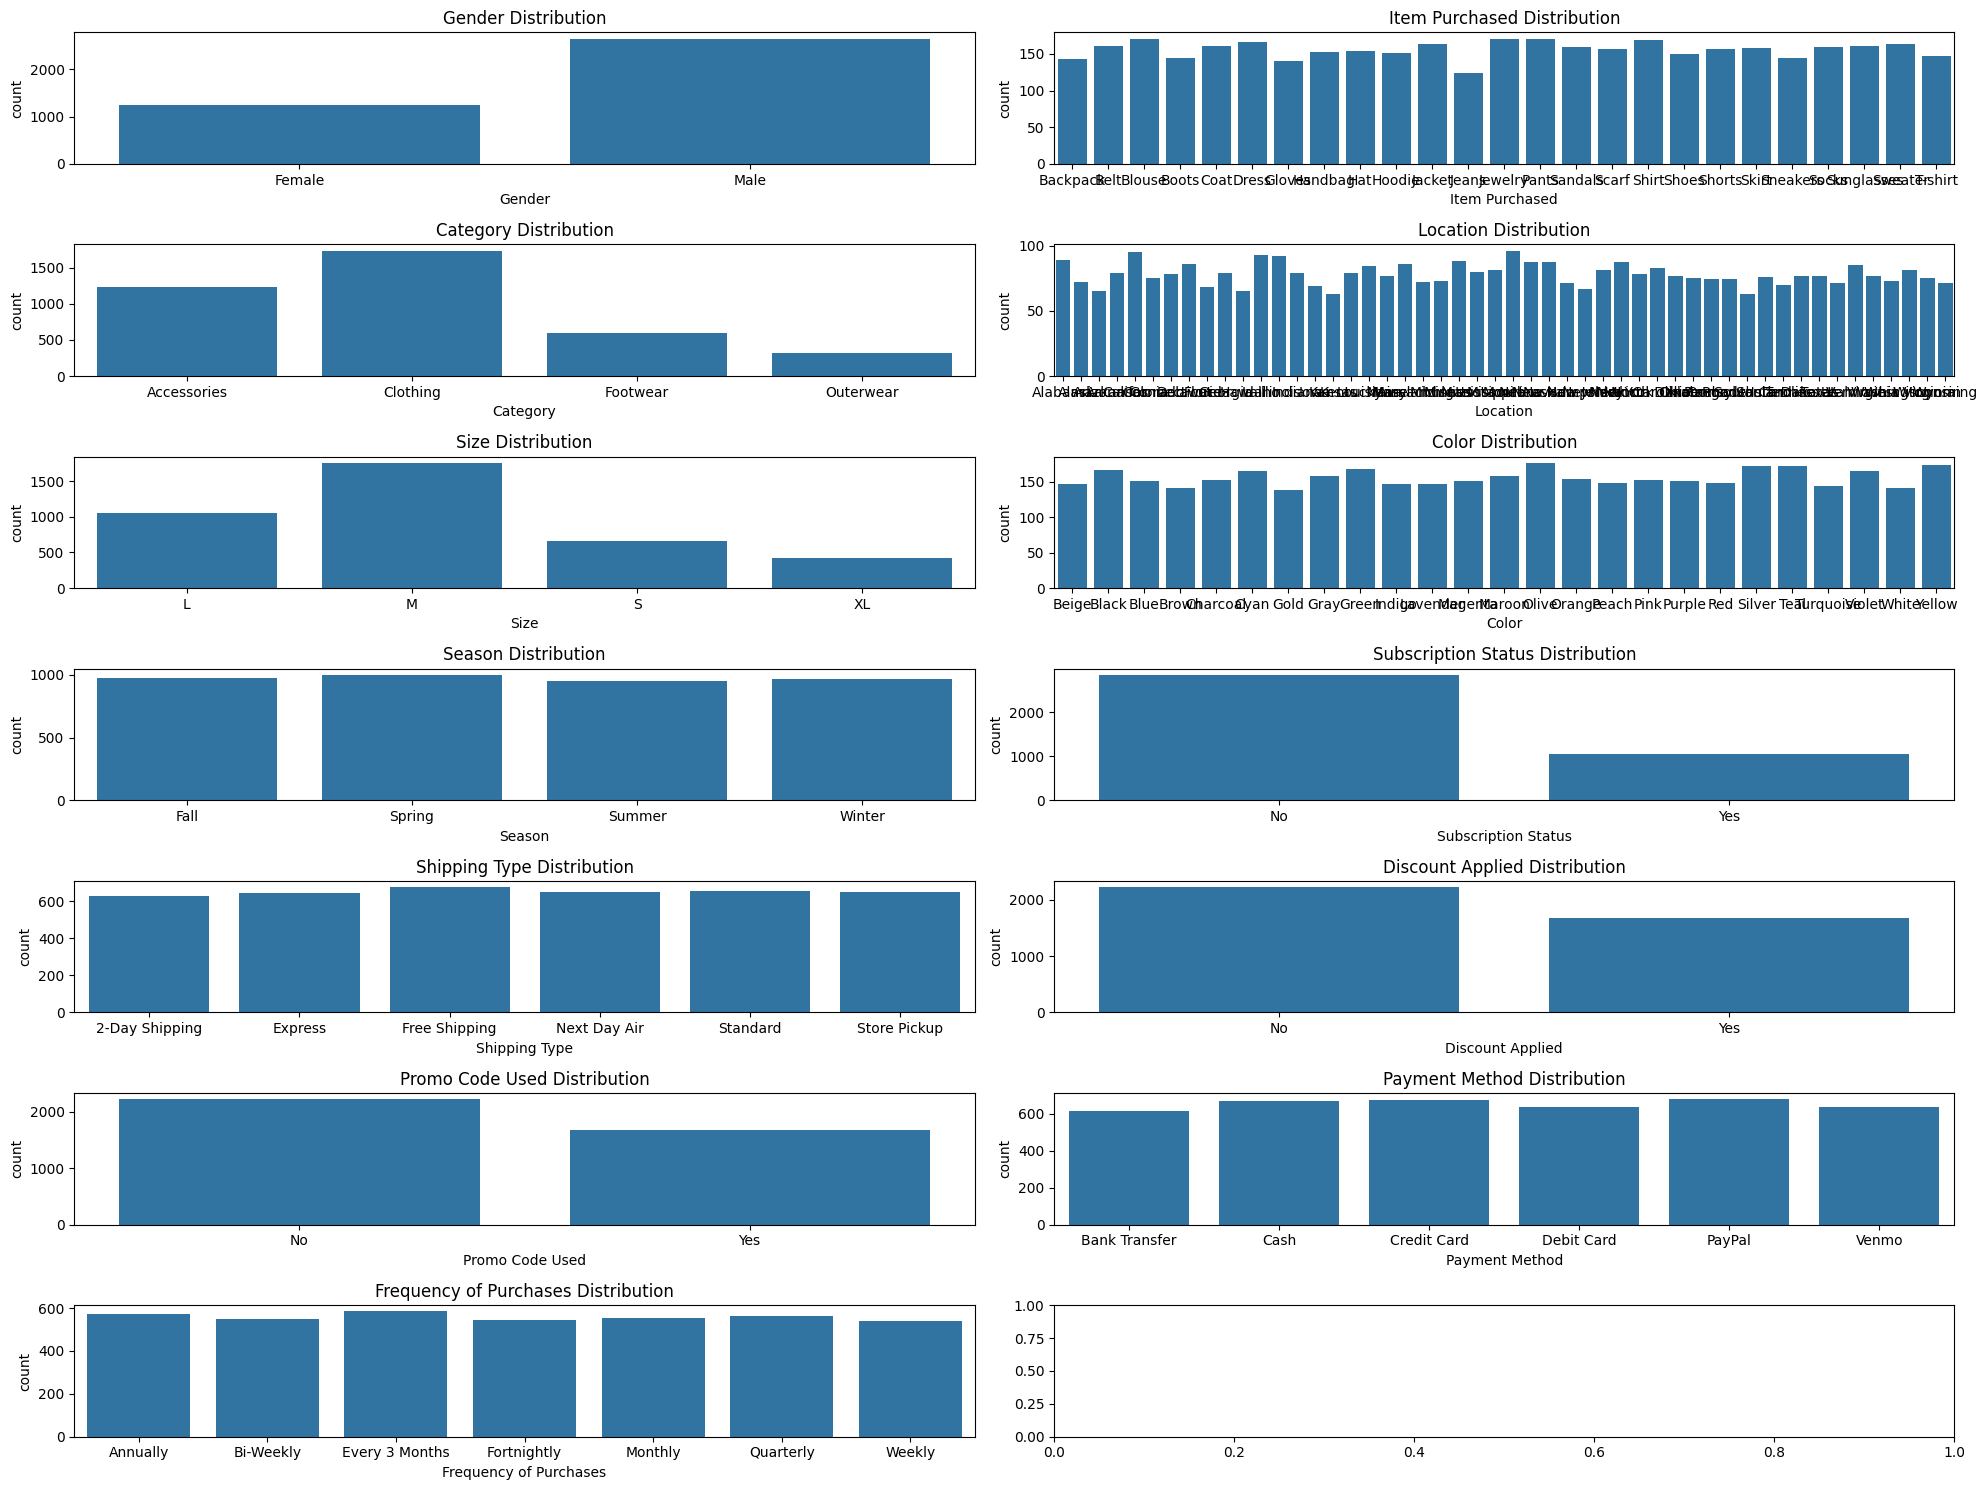

In [138]:
def plot_histograms(data):
  # Numerical data histograms
  data.hist(bins=30, figsize=(20,15))

  # Categorical data histograms in one canvas
  # x_count, y_count by len(categoricals)
  x_count = 2
  y_count = int(categoricals_len / x_count) + 1
  
  # Create a figure and axis
  fig, axs = plt.subplots(y_count, x_count, figsize=(20, 15))
  
  for i, category in enumerate(categoricals):
    # Calculate the row and column index
    row = i // x_count
    col = i % x_count

    # Create a count plot
    sns.countplot(x=category, data=data, ax=axs[row, col])

    # Set the title
    axs[row, col].set_title(f'{category} Distribution')

  # Add fig vertical spacing
  fig.tight_layout()

  # Show the plots
  plt.show()

plot_histograms(data)

In [139]:
# Try to drop duplicates and compare the shape
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)

# After dropping duplicates, we can see that the shape is the same, meaning there are no duplicates

(3900, 17)
(3900, 17)


In [140]:
# Check unique values for categorical data
for category in categoricals:
    print(f'{category} unique values: {data[category].unique()}')

# given the result, we see that there are no missing values in the categorical data or inconsistencies

Gender unique values: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Item Purchased unique values: ['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', ..., 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves']
Length: 25
Categories (25, object): ['Backpack', 'Belt', 'Blouse', 'Boots', ..., 'Socks', 'Sunglasses', 'Sweater', 'T-shirt']
Category unique values: ['Clothing', 'Footwear', 'Outerwear', 'Accessories']
Categories (4, object): ['Accessories', 'Clothing', 'Footwear', 'Outerwear']
Location unique values: ['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon', ..., 'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan']
Length: 50
Categories (50, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
Size unique values: ['L', 'S', 'M', 'XL']
Categories (4, object): ['L', 'M', 'S', 'XL']
Color unique values: ['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', ..., 'Orange', 'Indigo', 'Yellow',

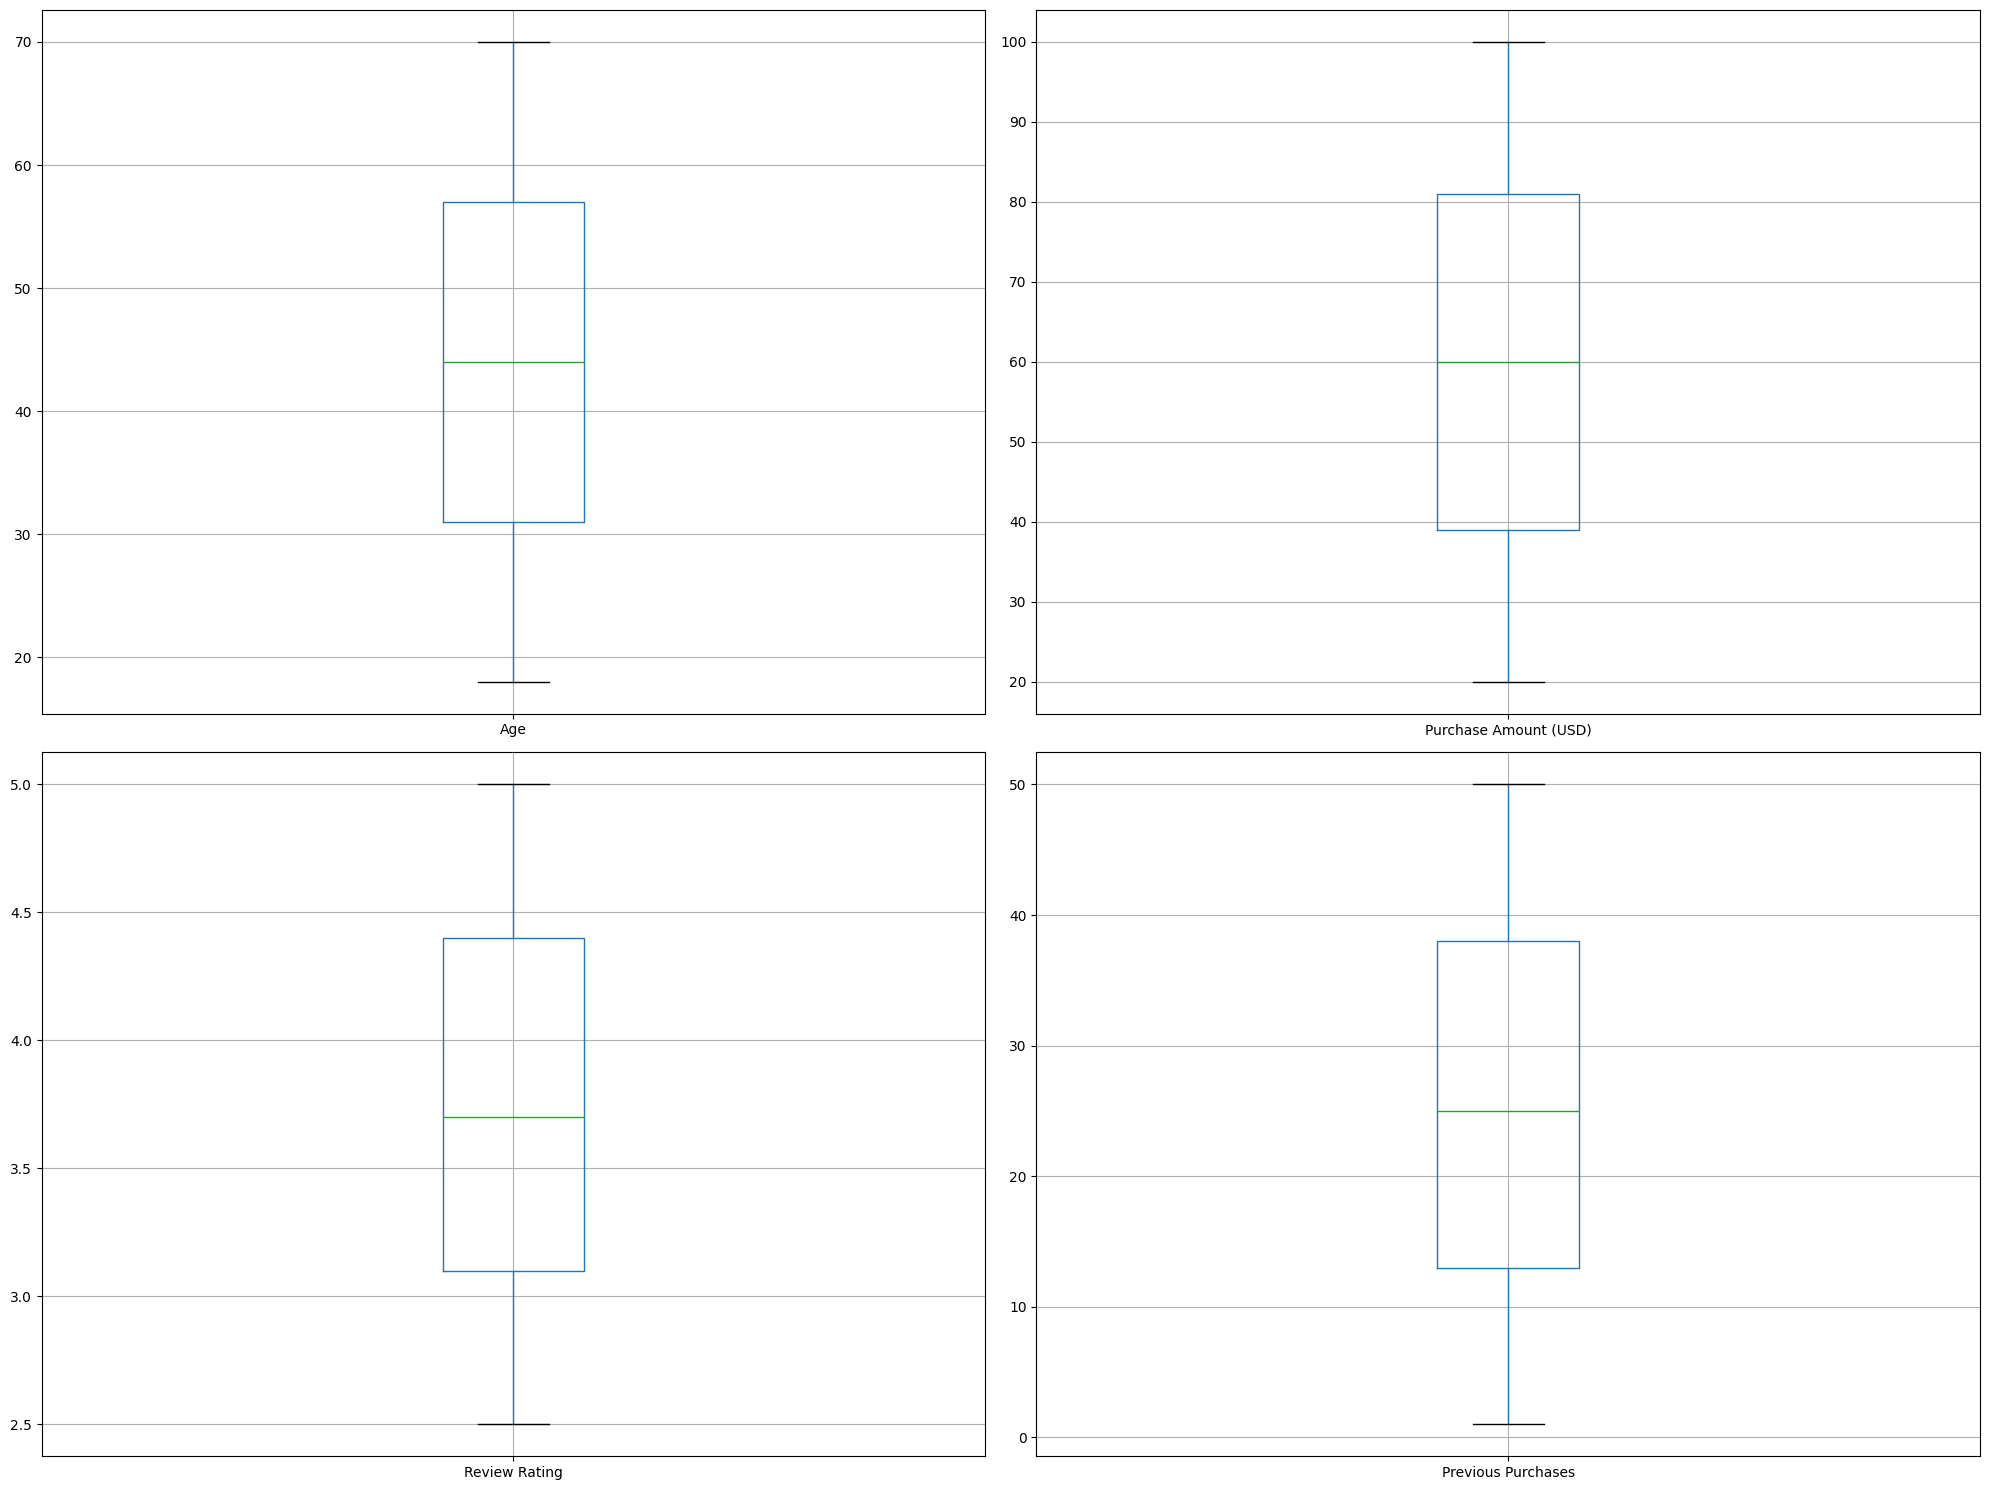

In [141]:
# Outliers Analysis using boxplot
def plot_boxplot(data):
  fig, axs = plt.subplots(2, 2, figsize=(20, 15))
  data.boxplot(column='Age', ax=axs[0, 0])
  data.boxplot(column='Purchase Amount (USD)', ax=axs[0, 1])
  data.boxplot(column='Review Rating', ax=axs[1, 0])
  data.boxplot(column='Previous Purchases', ax=axs[1, 1])

  # Add fig vertical spacing
  fig.tight_layout()

  # Show the plots
  plt.show()

plot_boxplot(data)

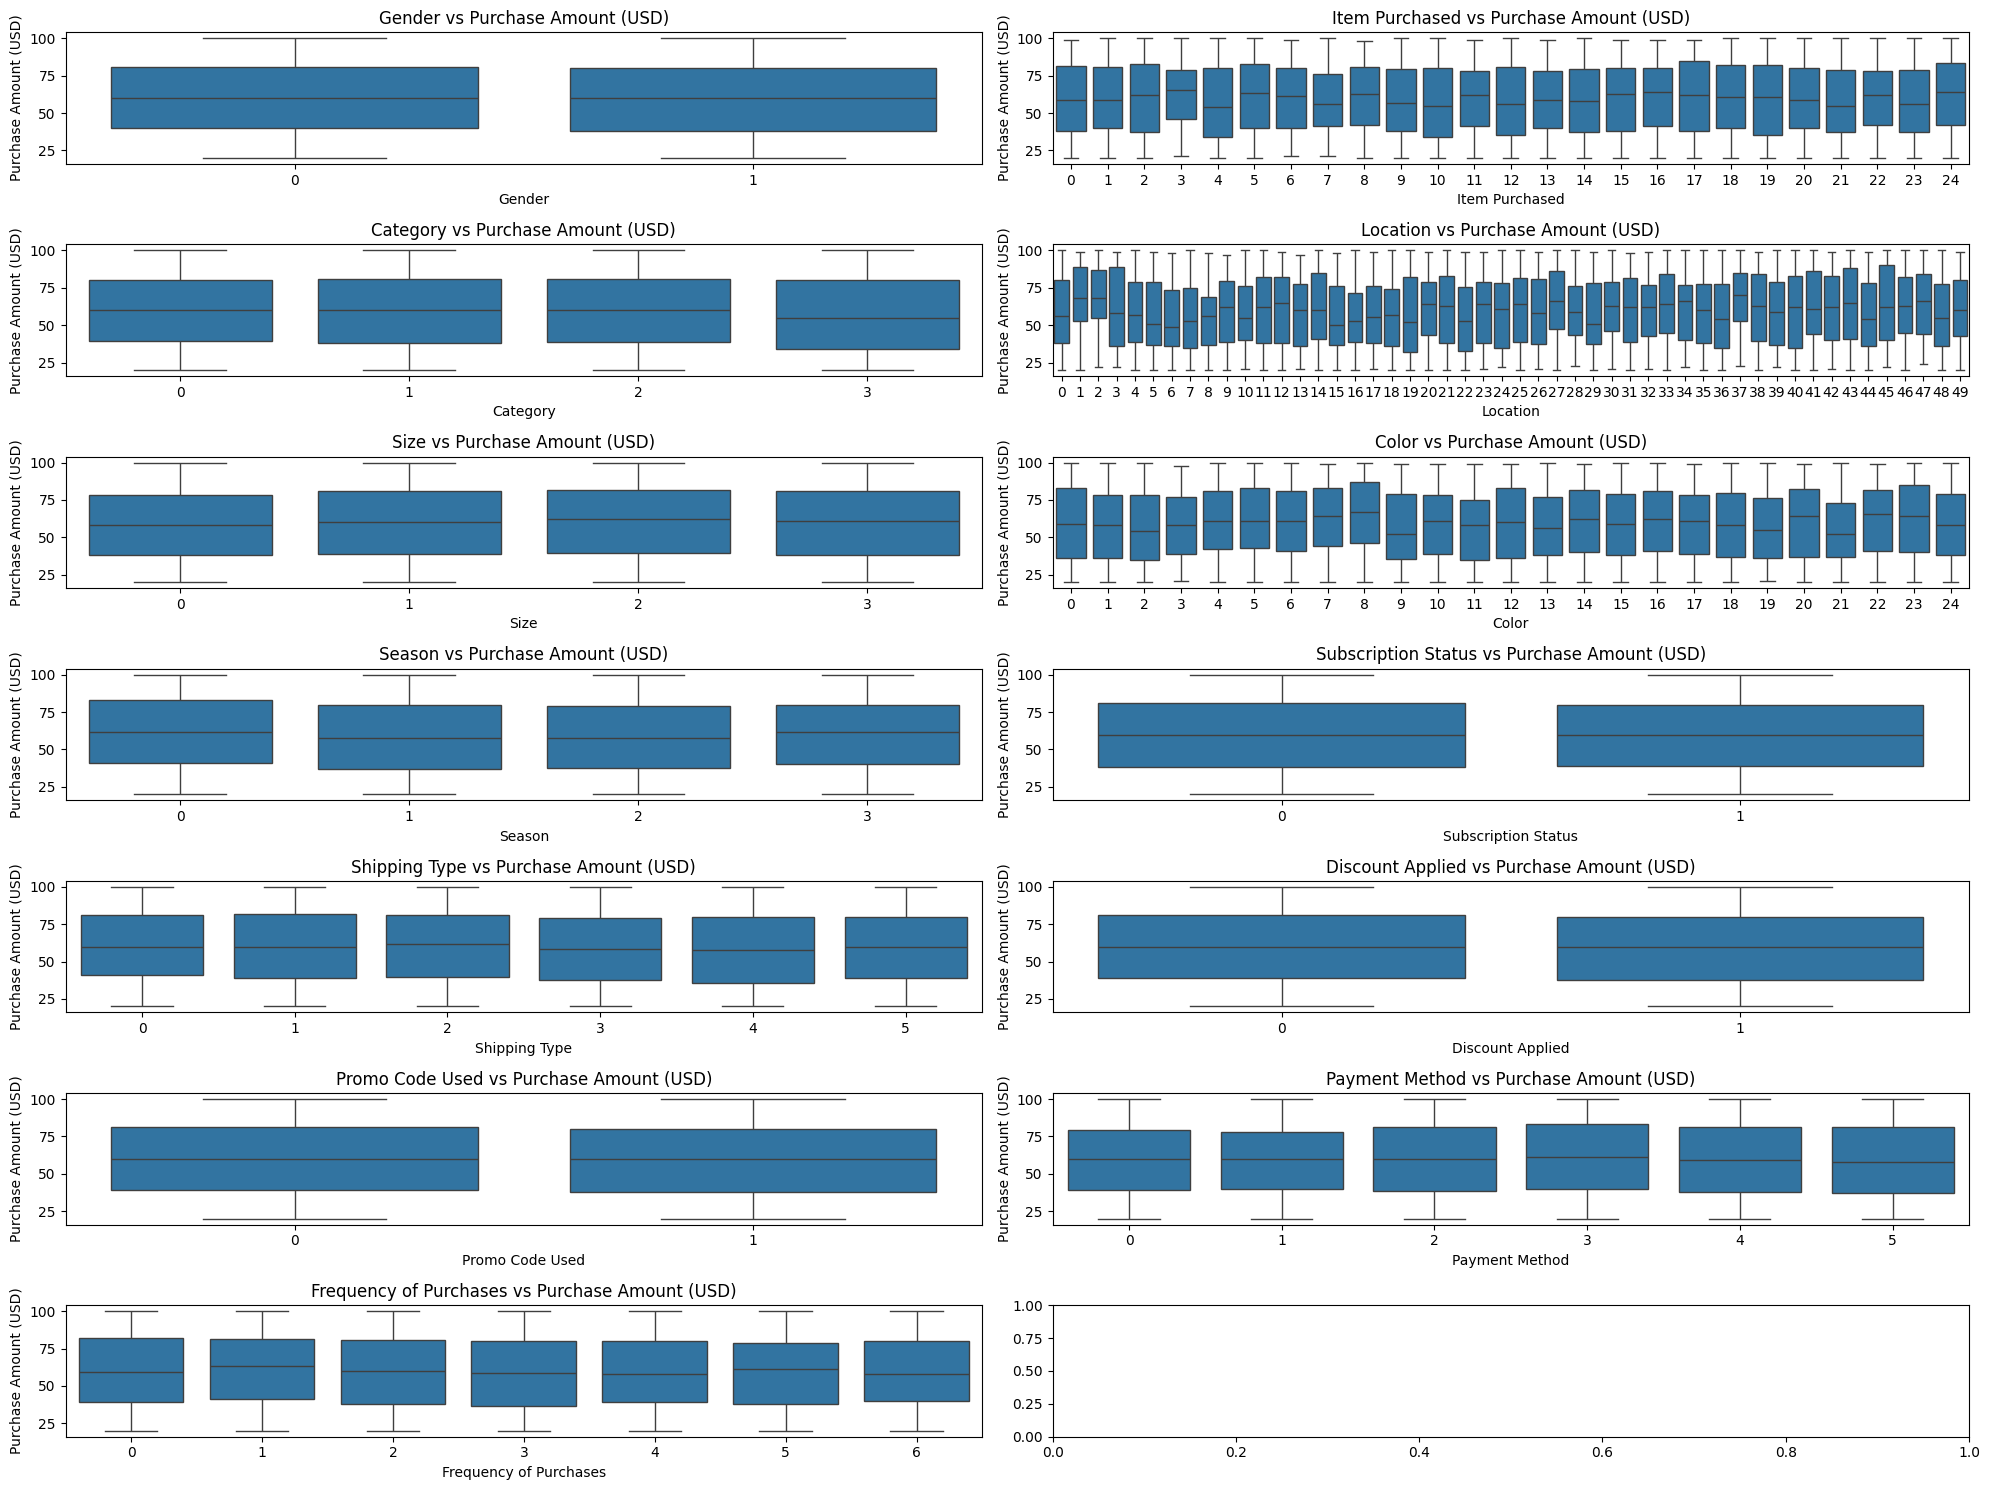

In [142]:
# Try to convert categorical data into numerical data
for category in categoricals:
    data[category] = data[category].cat.codes

# Show boxplot for the converted data
def plot_boxplot_converted(data):
  x_count = 2
  y_count = int(categoricals_len / x_count) + 1
  
  # Create a figure and axis
  fig, axs = plt.subplots(y_count, x_count, figsize=(20, 15))
  
  for i, category in enumerate(categoricals):
    # Calculate the row and column index
    row = i // x_count
    col = i % x_count

    # Create a boxplot
    sns.boxplot(x=category, y='Purchase Amount (USD)', data=data, ax=axs[row, col])

    # Set the title
    axs[row, col].set_title(f'{category} vs Purchase Amount (USD)')

  # Add fig vertical spacing
  fig.tight_layout()

  # Show the plots
  plt.show()

plot_boxplot_converted(data)

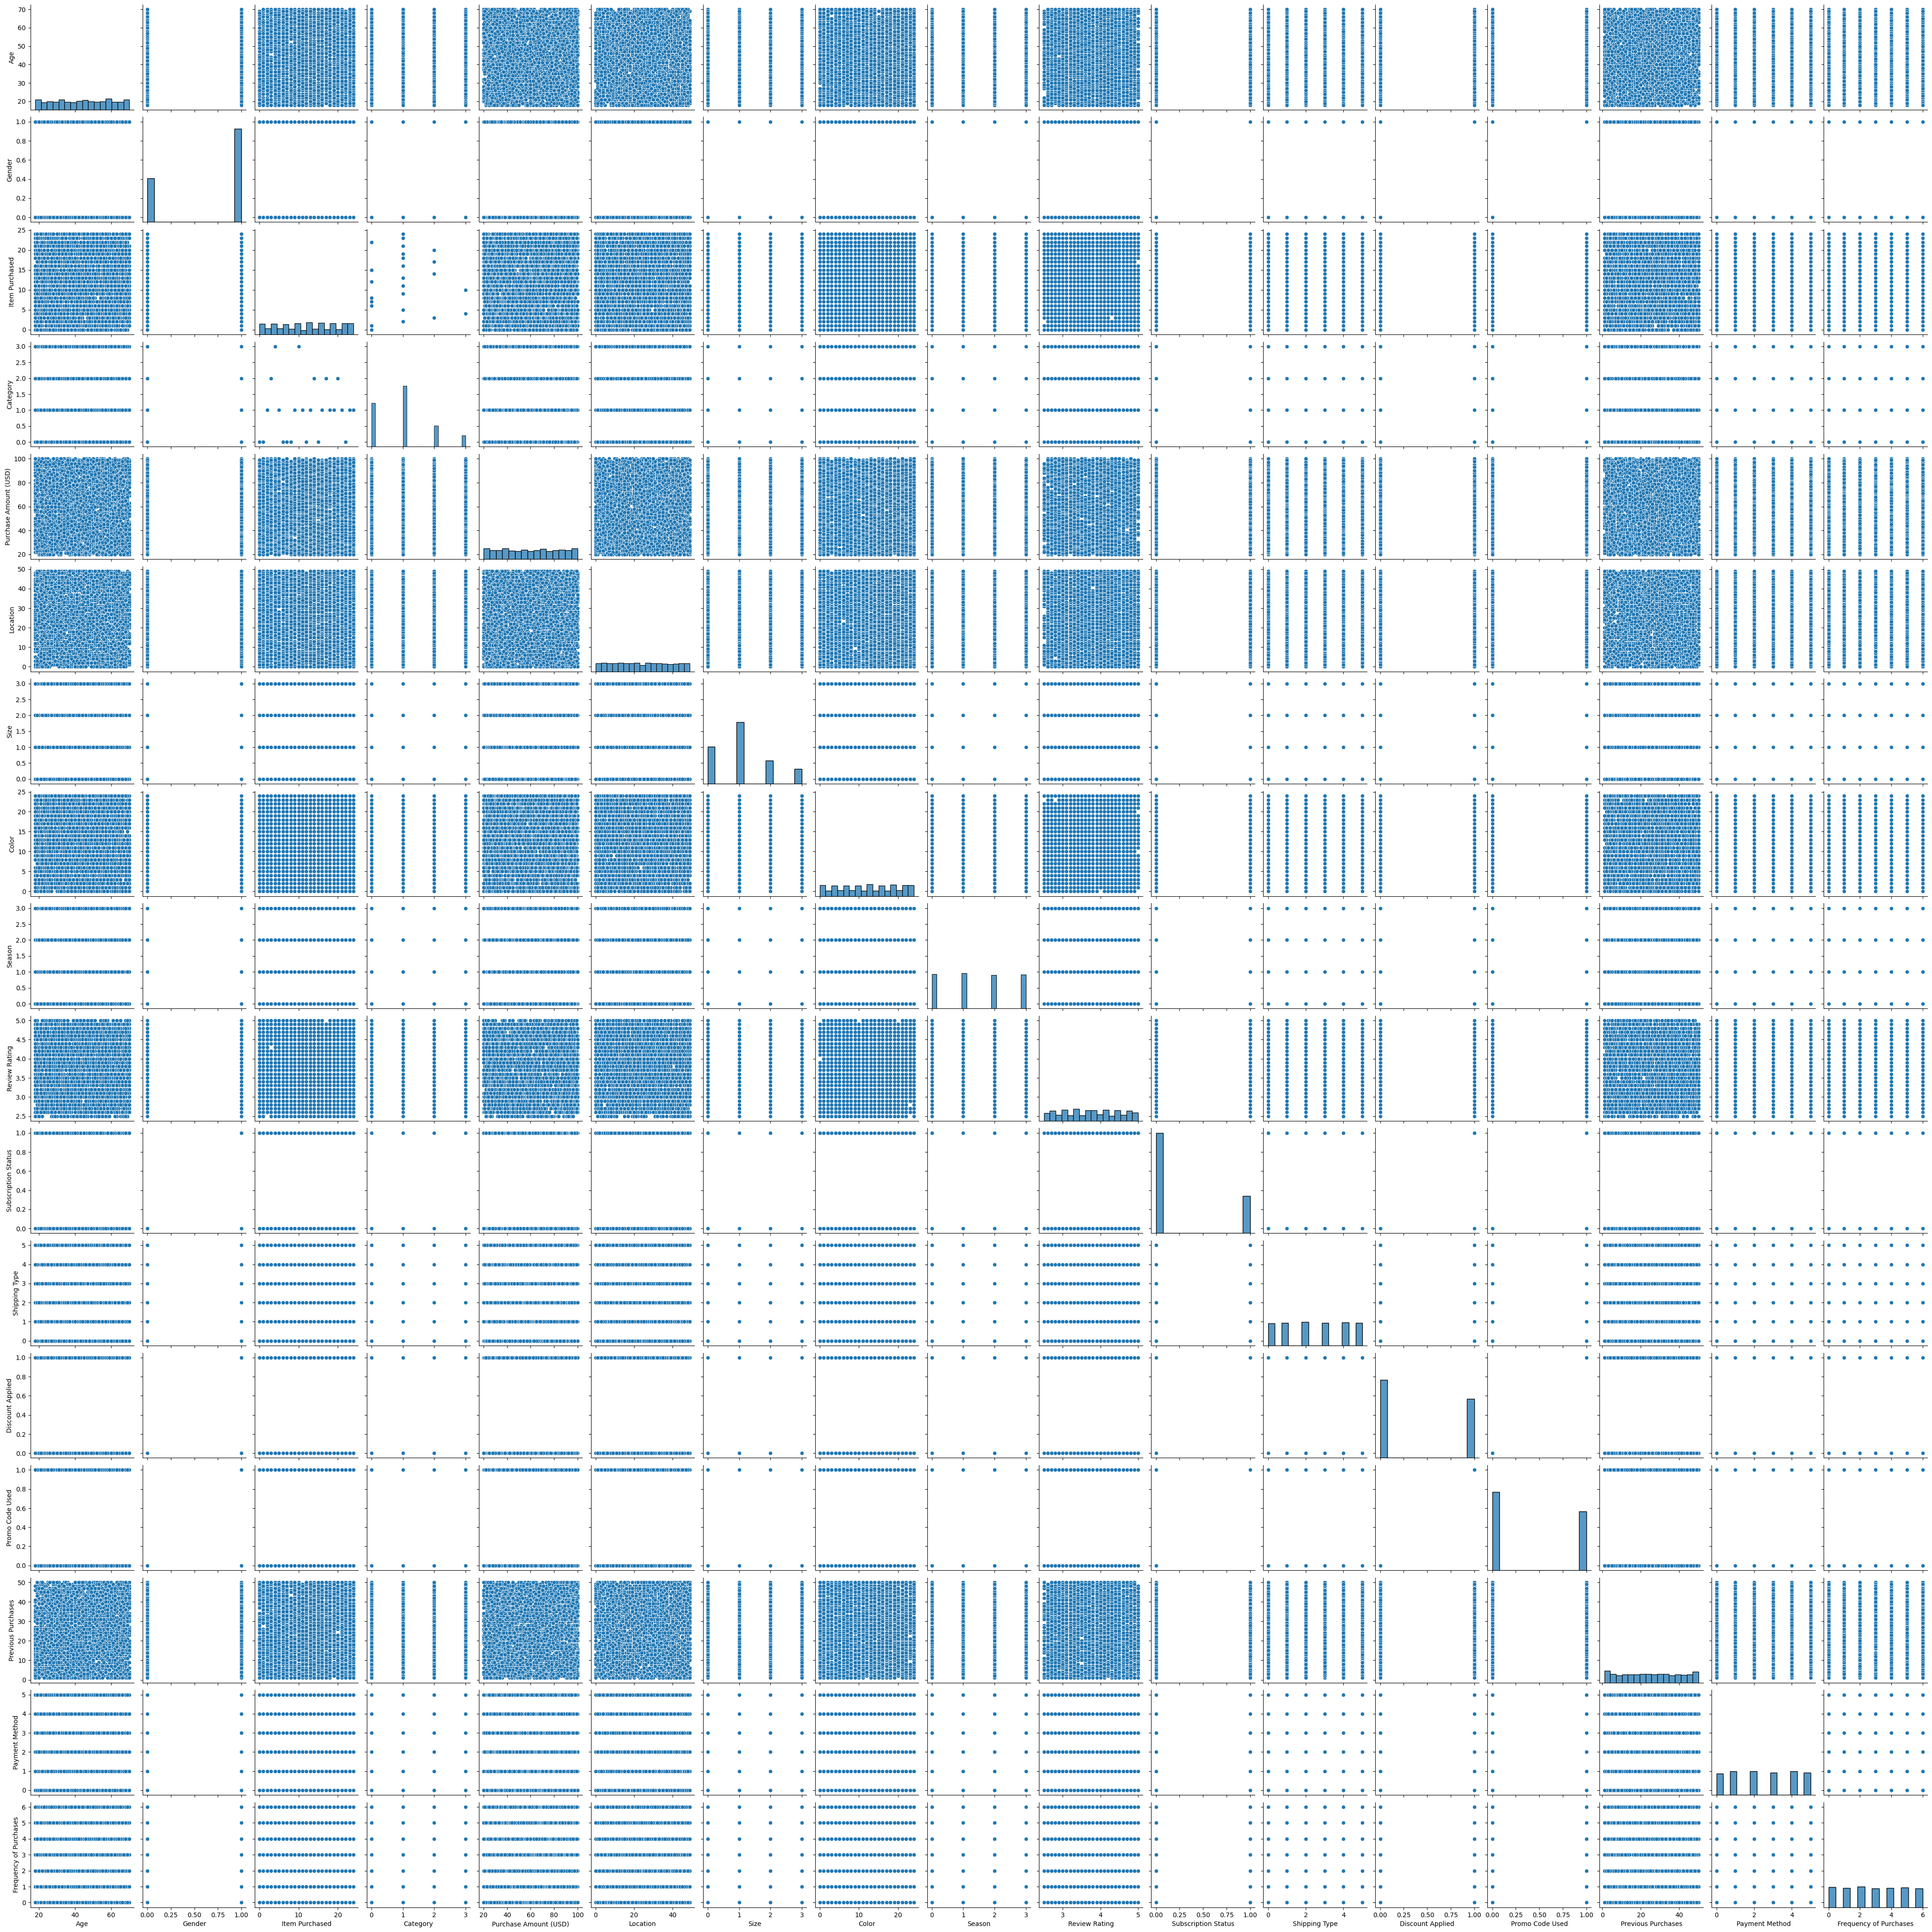

In [143]:
# Pairplot for correlation analysis
sns.pairplot(data, diag_kind='hist')

In [144]:
# Check the correlation matrix
print(data.corr())

                             Age    Gender  Item Purchased  Category  \
Age                     1.000000  0.002763       -0.000636  0.003546   
Gender                  0.002763  1.000000        0.001921 -0.004144   
Item Purchased         -0.000636  0.001921        1.000000  0.052951   
Category                0.003546 -0.004144        0.052951  1.000000   
Purchase Amount (USD)  -0.010424 -0.014044       -0.005342 -0.017841   
Location               -0.001957  0.000747        0.020390  0.000541   
Size                   -0.023654  0.018764       -0.008942 -0.035916   
Color                   0.006700 -0.000560        0.027241  0.009119   
Season                 -0.028418  0.016258        0.012755  0.000141   
Review Rating          -0.021949  0.008164       -0.004621 -0.000299   
Subscription Status     0.006492  0.417197        0.003028  0.011022   
Shipping Type          -0.010743  0.016490        0.016244 -0.009031   
Discount Applied        0.004366  0.595823       -0.013983  0.00